In [1]:
import numpy as np
import pandas as pd
# Importo OS solo para ver la lista de archivos de data
import os
import plotly.express as px

import seaborn as sns
import folium
from folium import plugins

import matplotlib.pyplot as plt 
import matplotlib.patches as patches 

from pandas.plotting import scatter_matrix

In [2]:
df = pd.read_csv(f"./data/datos_limpios.csv")

In [3]:
df.head(5)

,KM,Año,Combustible,Ciudad,Nº puertas,Garantía,Cambio,Color,Marca,Modelo,...,Velocidad máxima,Aceleracion,Consumo,Emisiones,Dimensiones,Etiqueta medioambiental,Precio,Largo,Ancho,Alto
0,79996,2019,Diésel,Riba Roja de Turia,5,True,Automático,Azul,SEAT,Leon,...,212,8.7,4.5,117,4548 mm / 1816 mm / 1439 mm,C,16990,4548,1816,1439
1,192300,2009,Diésel,Castuera,3,True,Manual,Beige,Volkswagen,Golf,...,190,10.7,4.5,119,4199 mm / 1779 mm / 1469 mm,B,8800,4199,1779,1469
2,211680,2007,Diésel,Castuera,5,True,Manual,Gris,Toyota,RAV4,...,200,9.3,7.0,185,4395 mm / 1815 mm / 1720 mm,B,9900,4395,1815,1720
3,192549,2011,Diésel,Castuera,5,True,Manual,Gris,Audi,Q5,...,190,11.4,6.5,172,4629 mm / 1880 mm / 1653 mm,B,16900,4629,1880,1653
4,215350,2013,Diésel,Castuera,5,True,Secuencial,Gris,Audi,A7,...,250,5.3,6.4,169,4969 mm / 1911 mm / 1420 mm,B,26500,4969,1911,1420


In [5]:
df = df[df["Año"] > 1900]
df = df[df["KM"] >= 0]
df = df[df["Precio"] < 500000]
df = df[df["Aceleracion"] < 30]
df = df[df["Potencia"] > 0]
df = df[df["Largo"] > 0]
df = df[df["Ancho"] > 0]
df = df[df["Alto"] > 0]

In [6]:
df["Año"].describe()

count    49707.000000
mean      2019.599372
std          3.406463
min       1996.000000
25%       2018.000000
50%       2020.000000
75%       2022.000000
max       2024.000000
Name: Año, dtype: float64

In [7]:
df["KM"].describe()

count    4.970700e+04
mean     6.516237e+04
std      6.511615e+04
min      1.000000e+00
25%      1.970000e+04
50%      5.250000e+04
75%      9.200000e+04
max      2.010810e+06
Name: KM, dtype: float64

In [8]:
df["Precio"].describe()

count     49707.000000
mean      23364.860422
std       15408.103044
min        1199.000000
25%       14995.000000
50%       19990.000000
75%       27500.000000
max      399000.000000
Name: Precio, dtype: float64

In [9]:
df["Aceleracion"].describe()


count    49707.000000
mean         9.892221
std          3.050986
min          0.000000
25%          8.900000
50%         10.300000
75%         11.500000
max         25.600000
Name: Aceleracion, dtype: float64

In [10]:
df["KM_log"] = df["KM"].apply(lambda x: np.log(x + 1))
df["Precio_log"] = df["Precio"].apply(lambda x: np.log(x + 1))

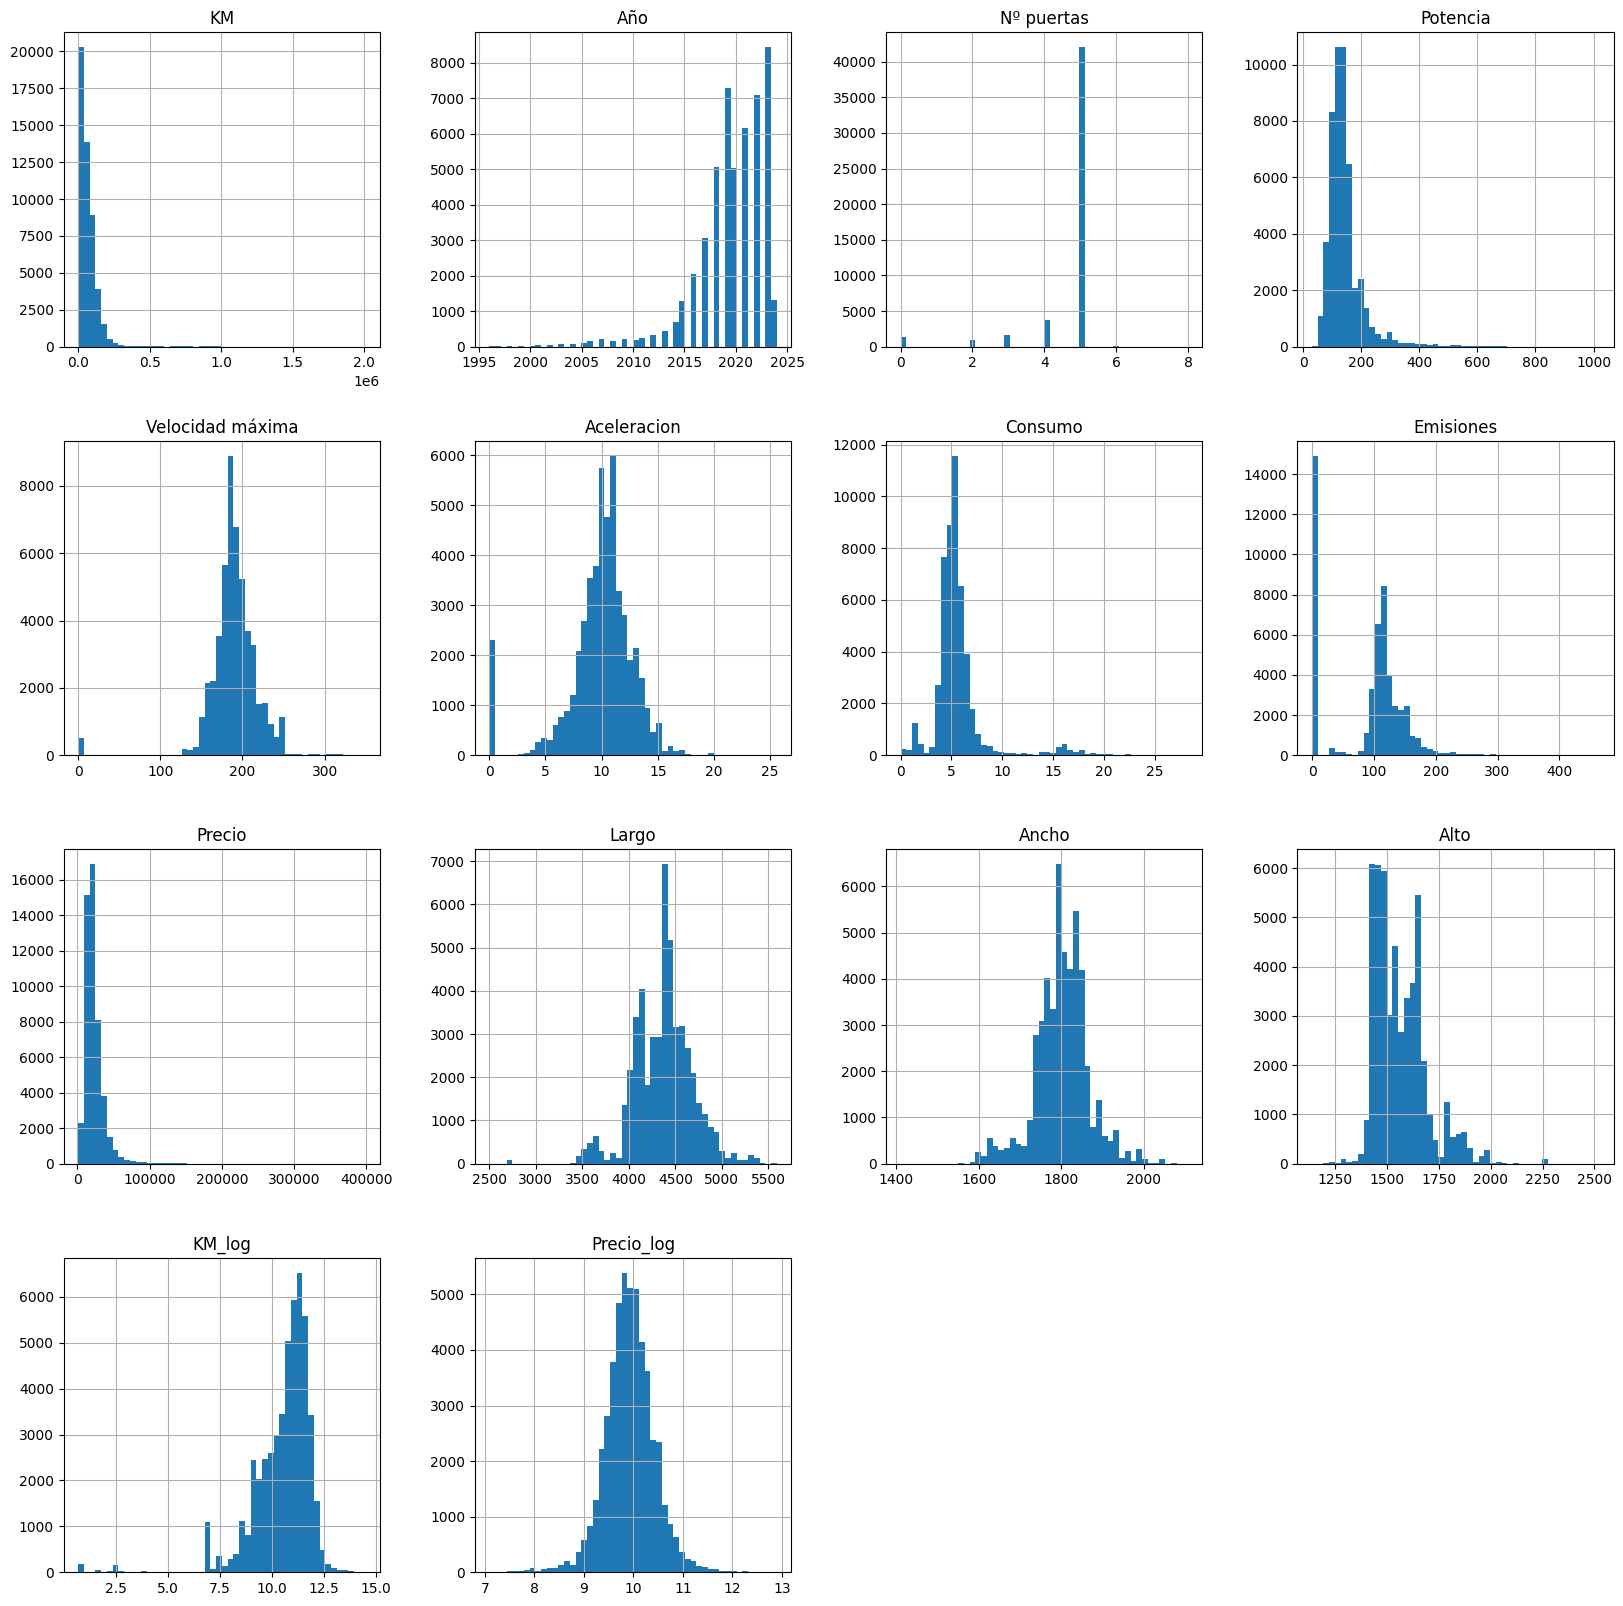

In [10]:
df.hist(bins=50, figsize=(20,20))

plt.show()

In [ ]:
df.columns

In [ ]:
scatter_matrix(df[["KM_log","Año","Potencia","Emisiones","Aceleracion","Consumo","Velocidad máxima","Largo","Precio_log"]], figsize=(20,20), alpha=0.5)
plt.show() 

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(x = df["Precio"], kde = True, ax = axes[0])
sns.boxplot(x = df["Precio"], ax = axes[1])

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(x = df["Precio_log"], kde = True, ax = axes[0])
sns.boxplot(x = df["Precio_log"], ax = axes[1])

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(x = df["KM_log"], kde = True, ax = axes[0])
sns.boxplot(x = df["KM_log"], ax = axes[1])

In [ ]:
fig = px.box(data_frame = df,
       x          = "Etiqueta medioambiental",
       y          = "Precio_log",
       points     = "suspectedoutliers",
       hover_name = "Marca"
      )

fig.update_layout(
    autosize=False,
    width=800,
    height=600,
)

fig.show()

In [ ]:
fig = px.box(data_frame = df,
       x          = "Combustible",
       y          = "Precio_log",
       points     = "suspectedoutliers",
       hover_name = "Marca"
      )

fig.update_layout(
    autosize=False,
    width=800,
    height=600,
)

fig.show()

In [ ]:
fig = px.box(data_frame = df,
       x          = "Tipo de carrocería",
       y          = "Precio_log",
       points     = "suspectedoutliers",
       hover_name = "Marca"
      )

fig.update_layout(
    autosize=False,
    width=1200,
    height=600,
)

fig.show()

In [ ]:
fig = px.sunburst(data_frame = df,
                  path       = ["Tipo de carrocería", "Etiqueta medioambiental"],
                  hover_name = "Tipo de carrocería",
                  color      = "Tipo de carrocería")

fig.update_traces(textinfo = "label+percent parent")

fig.update_layout(
    autosize=False,
    width=800,
    height=600,
)

fig.show()

In [ ]:
fig = px.scatter(
           data_frame  = df,
           x           = "Precio_log",
           y           = "Potencia",
           opacity     = 0.5,

           trendline="ols")

fig.update_layout(
    autosize=False,
    width=600,
    height=600,
)
fig.show()

In [ ]:
fig = px.imshow(img       = df[['KM', 'Año','Potencia', 'Velocidad máxima','Aceleracion', 'Consumo', 'Emisiones','Precio']].corr().round(2),
          text_auto = True)

fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)
fig.show()

In [ ]:
marcas_japonesas = ['Toyota', 'Nissan', 'Honda', 'Mazda', 'Mitsubishi', 'Infiniti', 'Lexus', 'Suzuki']
df_japones = df.loc[df['Marca'].isin(marcas_japonesas)]
fig = px.scatter(data_frame  = df_japones,
           x           = "Precio",
           y           = "Marca",
           color       = "Marca",
           hover_name  = "Modelo",
           opacity     = 1,
           template    = "plotly_dark",
           title       = "Correlación entre marca/modelo y precio ")

fig.update_layout(
    autosize=False,
    width=1200,
    height=600,
)
fig.show()

In [ ]:
fig = px.treemap(data_frame = df,
           values     = "Precio",
           path       = ["Marca", "Modelo"],
           hover_name = "Marca",
           color      = "Marca")

fig.update_layout(
    autosize=False,
    width=1400,
    height=800,
)
fig.show()

In [ ]:
fig = px.scatter(data_frame  = df,
           x           = "Precio",
           y           = "KM",
           color       = "Marca",
           hover_name  = "Marca",
           opacity     = 1,
           title       = "Variacion de precio segun kilometraje")

fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)
fig.show()


In [ ]:
promedio_precio_por_ciudad = df.groupby("Ciudad")["Precio"].mean().reset_index()
fig = px.bar(promedio_precio_por_ciudad, x="Ciudad", y="Precio", title="Precio Promedio por Ciudad")

fig.update_layout(
    autosize=False,
    width=1600,
    height=800,
)

# Mostrar el gráfico
fig.show()

In [ ]:
promedio_precio_por_marca = df.groupby("Marca")["Precio"].mean().reset_index()
fig = px.bar(promedio_precio_por_marca, x="Marca", y="Precio", title="Precio Promedio por Marca")

#Mostrar el gráfico
fig.show()

In [ ]:
promedio_precio_por_ciudad = df.groupby("Color")["Precio"].mean().reset_index()
fig = px.bar(promedio_precio_por_ciudad, x="Color", y="Precio", title="Precio Promedio por Color")

fig.update_layout(
    autosize=False,
    width=1200,
    height=600,
)

# Mostrar el gráfico
fig.show()

In [ ]:
df["Precio_log"].value_counts()

In [12]:
fig = px.box(df, x="Precio")
fig.show()